In [6]:
# import libraries...
import random
import numpy as np


# making random chromosomes...
def random_chromosome(size): 
    return [ random.randint(1, size) for _ in range(size) ]
# here, size=length of the each choromose.


# finding the fittess of each choromosome...
def fitness(chromosome):
    horizontal_attact = sum([chromosome.count(queen)-1 for queen in chromosome])/2
    diagonal_attact = 0

    n = len(chromosome)
    left_diagonal = [0] * 2*n
    right_diagonal = [0] * 2*n
    for i in range(n):
        left_diagonal[i + chromosome[i] - 1] += 1
        right_diagonal[len(chromosome) - i + chromosome[i] - 2] += 1

    diagonal_collisions = 0
    for i in range(2*n-1):
        counter = 0
        if left_diagonal[i] > 1:
            counter += left_diagonal[i]-1
        if right_diagonal[i] > 1:
            counter += right_diagonal[i]-1
        diagonal_attact += counter / (n-abs(i-n+1))

    return int(maxFitness - (horizontal_attact + diagonal_attact)) #28-(2+3)=23


# fitness probability function...
def probability(chromosome, fitness):
    return fitness(chromosome) / maxFitness


# genetic reproduction here...
def genetic_queen(population, fitness):
    mutation_probability = 0.5
    new_population = []
    probabilities = [probability(n, fitness) for n in population]
    for i in range(int(len(population)/2)):
        x = random_pick(population, probabilities) #best chromosome 1
        y = random_pick(population, probabilities) #best chromosome 2
        child = reproduce(x, y)                    #creating two new chromosomes from the best 2 chromosomes
        child1=child[0]
        child2=child[1]
        if random.random() < mutation_probability:
            child1 = mutate(child1)
            child2 = mutate(child2)
        print_chromosome(child1)
        print_chromosome(child2)
        new_population.append(child1)
        new_population.append(child2)
        if fitness(child1) == maxFitness: break
        if fitness(child2) == maxFitness: break
    return new_population


# pick the best parent...
def random_pick(population, probabilities):
    populationWithProbabilty = zip(population, probabilities)
    total = sum(w for c, w in populationWithProbabilty)
    r = random.uniform(0, total)
    upto = 0
    for c, w in zip(population, probabilities):
        if upto + w >= r:
            return c
        upto += w
    assert False, "Caution!!!"

    
# cross_over between two chromosomes...
def reproduce(x, y):
    n = len(x)
    c = random.randint(0, n - 1)
    child=[x[0:c] + y[c:n], y[0:c] + x[c:n]]
    return child


# muatation: randomly changing the value of a random index of a chromosome...
def mutate(x):  
    n = len(x)
    c = random.randint(0, n - 1)
    m = random.randint(1, n)
    x[c] = m
    return x


# printing method for choromosome!
def print_chromosome(chrom):
    print("Chromosome = {};  Fitness = {}."
        .format(str(chrom), fitness(chrom)))


# main method
if __name__ == "__main__":
    nq = int(input("Number of Queens: ")) #say N = 8
    print("")
    maxFitness = (nq*(nq-1))/2                  # if, nq=8, maxFitness= 8*7/2 = 28
    population = [random_chromosome(nq) for _ in range(50)]

    generation = 1
    gen=[]
    max_fit=[]

    while not maxFitness in [fitness(chrom) for chrom in population]:
        print("***************Generation {}***************".format(generation))
        population = genetic_queen(population, fitness)
        print("")
        print("Maximum Fitness in this Generation = {}".format(max([fitness(n) for n in population])))
        print("===========================================")
        print("")
        gen.append(generation)
        max_fit.append(max([fitness(n) for n in population]))
        generation += 1
        
        
    chrom_out = []
    print("Solved in Generation {}!".format(generation-1))
    for chrom in population:
        if fitness(chrom) == maxFitness:
            print("");
            print("One of the solutions: ")
            chrom_out = chrom
            print_chromosome(chrom)

    board = []

    for x in range(nq):
        board.append(["x"] * nq)

    for i in range(nq):
        board[nq-chrom_out[i]][i]="Q"


    def print_board(board):
        for row in board:
            print (" ".join(row))

    print()
    print_board(board)

Number of Queens: 5

***************Generation 1***************
Chromosome = [2, 2, 2, 2, 1];  Fitness = 3.
Chromosome = [5, 5, 5, 3, 5];  Fitness = 3.
Chromosome = [4, 3, 5, 3, 5];  Fitness = 7.
Chromosome = [2, 3, 5, 4, 2];  Fitness = 8.
Chromosome = [4, 3, 3, 3, 4];  Fitness = 5.
Chromosome = [1, 5, 2, 1, 1];  Fitness = 6.
Chromosome = [3, 5, 4, 1, 2];  Fitness = 9.
Chromosome = [4, 1, 3, 2, 5];  Fitness = 9.
Chromosome = [3, 1, 4, 5, 3];  Fitness = 8.
Chromosome = [1, 1, 4, 1, 4];  Fitness = 5.
Chromosome = [3, 4, 3, 5, 1];  Fitness = 8.
Chromosome = [5, 1, 5, 2, 1];  Fitness = 7.
Chromosome = [5, 1, 5, 1, 3];  Fitness = 7.
Chromosome = [1, 5, 2, 3, 4];  Fitness = 9.
Chromosome = [1, 5, 1, 1, 2];  Fitness = 6.
Chromosome = [5, 4, 1, 4, 4];  Fitness = 6.
Chromosome = [2, 5, 1, 2, 1];  Fitness = 7.
Chromosome = [3, 1, 2, 2, 1];  Fitness = 7.
Chromosome = [3, 1, 4, 2, 2];  Fitness = 8.
Chromosome = [1, 5, 3, 3, 1];  Fitness = 7.
Chromosome = [2, 5, 4, 3, 1];  Fitness = 9.
Chromosome =

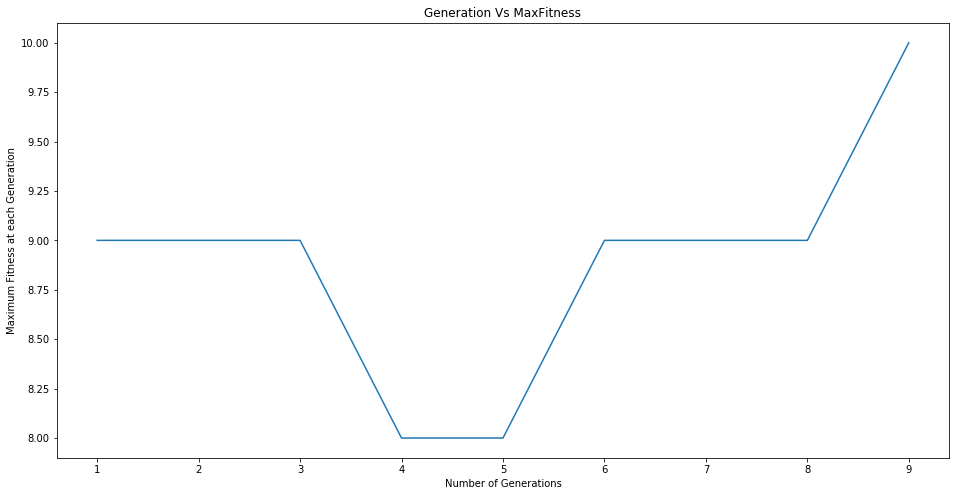

In [7]:
# plotting

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(gen,max_fit)
plt.title('Generation Vs MaxFitness')
plt.xlabel("Number of Generations")
plt.ylabel('Maximum Fitness at each Generation')
plt.show()